# Prediction of Dengue Fever

In [48]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt

import os
import pandas as pd
import numpy as np
import seaborn as sb

## Data Import and Pre-Processing

In [40]:
# Import features training dataset
features_training_data = os.path.join("Data", "dengue_features_train.csv")
features_training_df = pd.read_csv(features_training_data)
features_training_df.head()
len(features_training_df)

1456

**There are 1456 training observations.**

In [41]:
# Import features testing dataset
features_testing_data = os.path.join("Data", "dengue_features_test.csv")
features_testing_df = pd.read_csv(features_testing_data)
features_testing_df

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.001500,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,...,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0
412,iq,2013,23,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,...,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0
413,iq,2013,24,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,...,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2
414,iq,2013,25,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,...,4.70,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1


**There are 416 test observations.**

In [22]:
# Import training labels dataset, leave only total_cases
labels_training_data = os.path.join("Data", "dengue_labels_train.csv")
labels_training = pd.read_csv(labels_training_data)
labels_training_df = labels_training.drop(columns=['city', 'year', 'weekofyear'])
labels_df

,total_cases
0,4
1,5
2,4
3,3
4,6
...,...
1451,5
1452,8
1453,1
1454,1


### Process Training Data

In [26]:
# Drop unneccesary features
features_training_processing = features_training_df.drop(columns=['year','weekofyear','week_start_date'])
features_training_processing

# One-hot encode city column
features_encoded = pd.get_dummies(features_training_processing, columns=['city'])
features_encoded.head()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city_iq,city_sj
0,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,...,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,0,1
1,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,...,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,0,1
2,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,...,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,0,1
3,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,...,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,0,1
4,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,...,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,0,1


In [47]:
# Check for null values
features_encoded.isnull().sum().sort_values(ascending=False)

ndvi_ne                                  194
ndvi_nw                                   52
station_diur_temp_rng_c                   43
station_avg_temp_c                        43
ndvi_se                                   22
ndvi_sw                                   22
station_precip_mm                         22
station_max_temp_c                        20
station_min_temp_c                        14
precipitation_amt_mm                      13
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
reanalysis_relative_humidity_percent      10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_min_air_temp_k                 10
reanalysis_max_air_temp_k                 10
reanalysis_dew_point_temp_k               10
reanalysis_avg_temp_k                     10
reanalysis_air_temp_k                     10
city_iq                                    0
city_sj                                    0
dtype: int

<Axes: >

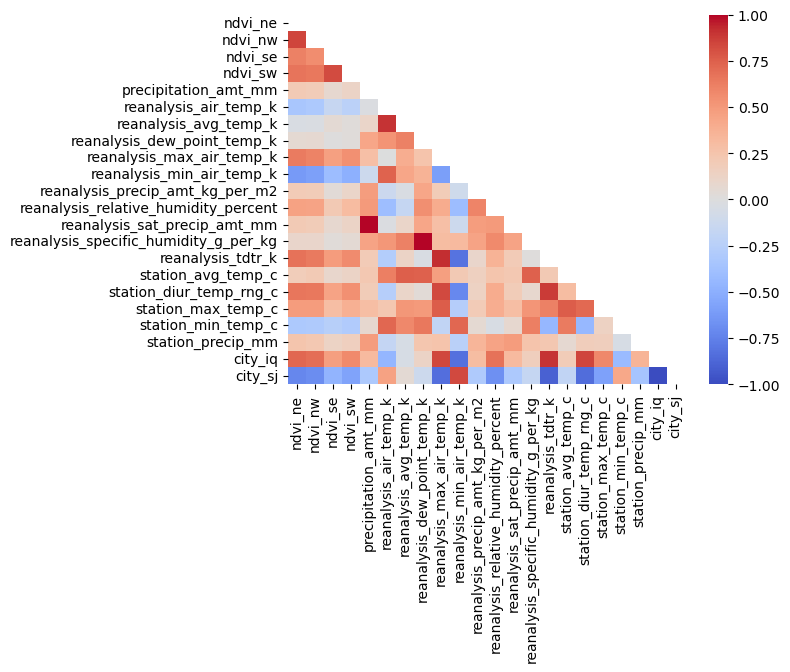

In [57]:
# Examine pearson correlation matrix to see if some variables should be excluded from analysis
corr_matrix = features_encoded.corr(method='pearson') #.unstack().sort_values().drop_duplicates()

# Create heatmap for easier visualization
lower = np.triu(corr_matrix)
sb.heatmap(corr_matrix,cmap='coolwarm', mask=lower)
# Customary to keep features with correlation coefficients smaller than absolute value of 0.8